<a href="https://colab.research.google.com/github/DanielDialektico/Machine-Learning/blob/main/Notebooks/Otros/Tutorial_API_de_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

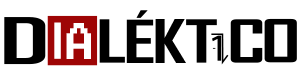

**INTRODUCCIÓN A LA API DE SPOTIFY PARA PYTHON 🎼**

Instalamos la librería:

In [ ]:
!pip install spotipy

Se declaran las variables con las **credenciales** ([ver tutorial](https://dialektico.com/tutorial-api-spotify-python/)), y la variable que utilizaremos para acceder a la API.

In [ ]:
# Se importan las librerías necesarias.
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

# Se declara el ID del cliente.
client_id = 'Añade tu Client ID'

# Se declara el valor del secret client.
client_secret = 'Añade tu Client Secret'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Visualizamos el formato en el que se entrega la información, usando como ejemplo la extracción de datos de la agrupación **Blackpink**.

In [ ]:
# Se busca información sobre Blackpink.
result = sp.search(q='Blackpink', type='artist', limit=1)

# Se imprime el resultado.
result

Ahora accedemos a un elemento en particular del diccionario, extrayendo el **número de seguidor**es del grupo en la plataforma:

In [ ]:
# Se imprime el número de seguidores de Blackpink.
result['artists']['items'][0]['followers']['total']

Obtenemos el top de canciones más populares de la banda utilizando el método [artist_top_tracks](https://spotipy.readthedocs.io/en/2.22.1/#spotipy.client.Spotify.artist_top_tracks):

In [ ]:
# Se busca información sobre Blackpink y se obtiene su ID de artista.
result = sp.search(q='Blackpink', type='artist', limit=1)
blackpink_id = result['artists']['items'][0]['id']

# Se obtienen las 10 canciones más escuchadas de Blackpink.
results = sp.artist_top_tracks(blackpink_id, country='US')

# Se imprime el nombre de las canciones.
for track in results['tracks']:
    print(track['name'])

Creamos una función que crea una función para la extracción de 50 canciones de un **género** definido (entrada), sus características, y acomoda la información en un dataFrame de **Pandas**:

In [ ]:
def songs_by_genre(genre):

    # Se buscan las 50 canciones más populares del género especificado.
    results = sp.search(q=f'genre:{genre}', type='track', limit=50)
    tracks = results['tracks']['items']

    # Se crea una lista de diccionarios con el nombre de la canción y las características deseadas.
    song_features = []
    for track in tracks:
        features = sp.audio_features(track['id'])[0]
        song_features.append({'Nombre': track['name'], 'Bailabilidad': features['danceability'], 'Energía': features['energy'], 'Acústica': features['acousticness'], 'Duración (ms)': features['duration_ms'],
                          'Acústica': features['acousticness'], 'Instrumentalidad': features['instrumentalness'], 'Sonoridad': features['loudness'], 'Tempo': features['tempo'],
                          'Discursividad': features['speechiness'],'ID': features['id'], 'Modo': features['mode'], 'Valencia': features['valence'], 'Género': genre})


    # Se crea un dataFrame de Pandas con la información extraída.
    data_frame = pd.DataFrame(song_features)

    return data_frame

Creamos un bucle que obtenga estos datos para cada género especificado en una **lista**, y concatenamos las **tablas** resultantes:

In [ ]:
# Se importa una librería para la generación de una barra de progreso.
from tqdm import tqdm

# Se crea una lista con los géneros musicales deseados.
genres_list = ['world-music', 'salsa', 'rock-n-roll', 'reggae', 'reggaeton', 'pop', 'black-metal', 'k-pop', 'hip-hop', 'electronic']

# Se itera sobre esta lista utilizando sus elementos como entradas de la función creada.
tables = []

for item in tqdm(genres_list, desc = 'Creando conjunto de datos:'):
  table = songs_by_genre(item)
  tables.append(table)

# Se concatenan las tablas y se imprime el resultado.
dataset = pd.concat(tables)
dataset

Por último se descarga en formato CSV:

In [ ]:
# Se convierte a formato CSV.
dataset.to_csv('dataset.csv', index=False)

# Se descarga el CSV.
from google.colab import files
files.download('dataset.csv')

O en formato XLS:

In [ ]:
# Se convierte a formato Excel.
dataset.to_excel('dataset.xlsx', index=False)

# Se descarga el Excel.
from google.colab import files
files.download('dataset.xlsx')

No olvides que puedes encontrar más tópicos como este en https://dialektico.com/.